In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [4]:
df.isna().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
import seaborn as sns
numerical_columns = df.select_dtypes(include=['int64','float64']).columns

In [6]:
numerical_columns

Index(['id', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

this plot show the outoutliers in each column After delete them


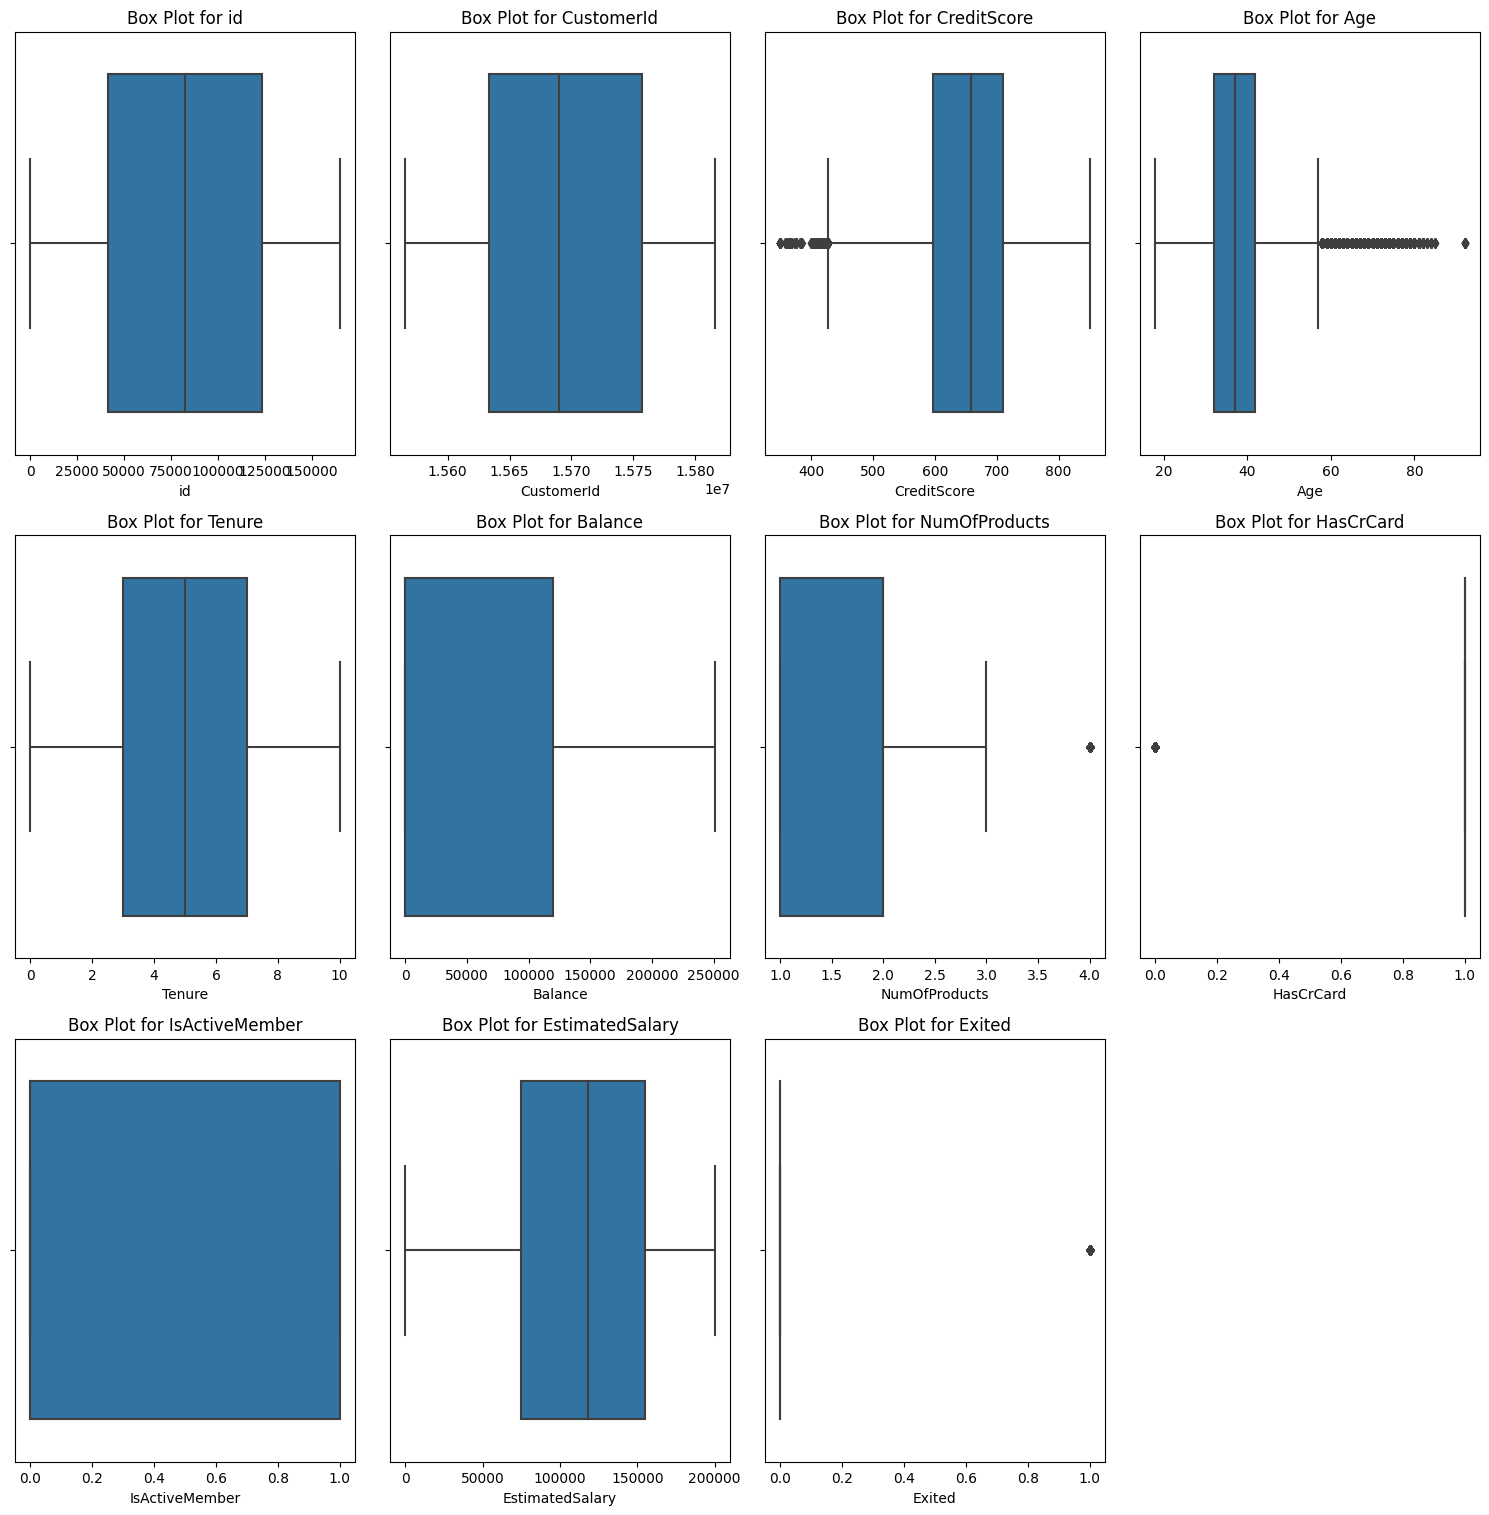

In [7]:
print("this plot show the outoutliers in each column After delete them")

# Determine the number of rows and columns for the grid layout
num_features = len(numerical_columns)
num_rows = 8  # Set the number of rows
num_cols = 4  # Set the number of columns

# Calculate the figure size based on the number of rows and columns
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 40))

# Flatten the axes array to simplify indexing
'''
subplot returns a 2D index matrix to access the figures so when we flatten it inot 1D it's easier to access
'''
axes = axes.flatten()

# Iterate over numerical features and create individual box plots in subplots
for i, column in enumerate(numerical_columns):
    if i < num_features:
        sns.boxplot(x=df[column], ax=axes[i])
        axes[i].set_title(f'Box Plot for {column}')


# Remove empty subplots (8*5 = 40 but we have only 37 features to plot)
for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plots
plt.show()

In [8]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Surname'] = encoder.fit_transform(df['Surname'])
df['Gender'] = encoder.fit_transform(df['Gender'])
df['Geography'] = encoder.fit_transform(df['Geography'])

In [9]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score
import xgboost as xgb 

In [10]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Create XGBoost classifier
model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

grid_search = GridSearchCV(model, param_grid, scoring='roc_auc', cv=5)

grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Make predictions on the validation set using the best model
y_val_pred_proba = grid_search.predict_proba(X_val)[:, 1]

# Evaluate using ROC-AUC score
roc_auc_val = roc_auc_score(y_val, y_val_pred_proba)
print(f'ROC-AUC Score on Validation Set: {roc_auc_val}')

Best Hyperparameters: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.9}
ROC-AUC Score on Validation Set: 0.8929483067818905


In [18]:
param_grid = {
    'learning_rate': [0.1],
    'n_estimators': [200],
    'max_depth': [5],
    'subsample': [0.9],
    'colsample_bytree': [0.9],
}

model = xgb.XGBClassifier(objective='binary:logistic', random_state=42,**param_grid)

In [20]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, train_test_split

# Assuming 'X_train', 'y_train' are your training data
# and 'param_grid' is your hyperparameter grid

# Create an XGBoost classifier
model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Define the hyperparameter grid
param_grid = {
    'learning_rate': [0.1],
    'n_estimators': [200],
    'max_depth': [5],
    'subsample': [0.9],
    'colsample_bytree': [0.9],
}

# Create GridSearchCV
grid_search = GridSearchCV(model, param_grid, scoring='roc_auc', cv=3, n_jobs=-1)

# Fit the model with the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_


In [21]:
param_grid = {
    'learning_rate': 0.1,
    'n_estimators': 200,
    'max_depth': 5,
    'subsample': 0.9,
    'colsample_bytree': 0.9,
}

model = xgb.XGBClassifier(objective='binary:logistic', random_state=42, **param_grid)

# Fit the model
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [22]:
# Make predictions on the validation set using the best model
y_val_pred_proba = grid_search.predict_proba(X_val)[:, 1]

# Evaluate using ROC-AUC score
roc_auc_val = roc_auc_score(y_val, y_val_pred_proba)
print(f'ROC-AUC Score on Validation Set: {roc_auc_val}')

ROC-AUC Score on Validation Set: 0.8929483067818905


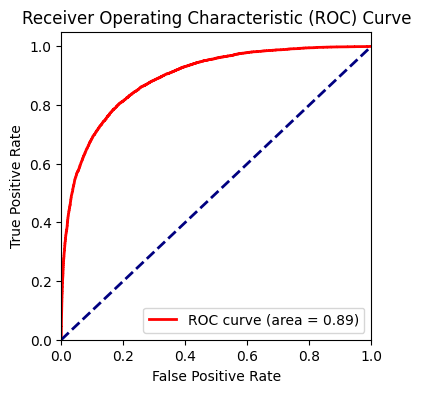

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming 'model' is already trained and 'X_val', 'y_val' are the validation set
# Also, 'y_pred_proba' is the predicted probabilities obtained from the model

# Compute ROC curve and ROC-AUC score
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import joblib
model = joblib.dump(model, 'model4.pkl')